<a href="https://colab.research.google.com/github/PriscillaMuli/Online-Social-Media-Content-Analysis-Project-/blob/main/Online_Social_Media_Content_Analysis_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Project Objective**
**1.1 Defining the Question** 

The objective of the project is an analysis of a situation when a specific person intends to use hate speech in Twitter comments. 

The main objective is the creation of a model that can identify hateful tweets.


**1.2 Defining the Metric for Success**

Metric of success for this project is the successful creation of an identification model which can recognize hateful tweets.
The score which indicates that the model is a success is the F1 score. 

Above 75% in accurate prediction of  which category the tweets belongs is required.

**1.3  Business Understanding**

The rise of social media usage is the motivation behind this project. Social media has become a critical part of life where users express opinions, some of which might be hateful. A high number of social media users, Twitter, in specific are subjected to hateful speech due to the high level of anonymity possible on social media, Twitter. In a bid to solve this problem, a machine learning model can be utilized for tweet classification thus enabling the user to spot the difference between hateful and non-hateful tweets.

**1.4 Recording the Experimental Design**

The following design was used:

1. Data importation - loading the dataset with appropriate libraries to use

2. Data Cleaning - do the needed steps to clean the data

3. Exploratory Data Analysis - univariate and bivariate data analysis

4. Feature Engineering and Preprocessing - feature engineering and preprocessing are applied

5. Modelling - application of machine learning model

6. Evaluation and recommendations - comment on each tested model's suitability in solving the problem

7. Conclusion - final remarks on the project

**1.5 Data Relevance**

The data provided was found to be suitable for this data analysis considering the question given.

# **2. Data Importation**

In [ ]:
# Import relevant libraries 
import scipy
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import re
import string
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
# Read csv files 
train = pd.read_csv("/content/train_tweet.csv")
test = pd.read_csv("/content/test_tweets.csv")

In [ ]:
# Preview first ten entries of train data
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# Preview first ten entries of test data
test.head(10)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [ ]:
# Shape of data which gives the dimensions of the data rows and columns of the data
# The train dataset has 31,962 rows by 3 columns
train.shape

(31962, 3)

In [ ]:
# Shape of data which gives the dimensions of the data rows and columns of the data
# The test dataset has 17,197 rows by 2 columns
test.shape

(17197, 2)

In [ ]:
# Checking if each column has an appropriate datatype
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [ ]:
# Checking distribution of hateful and non-hateful comments 
train['label'].unique()

array([0, 1])

# **3. Data Cleaning**

In [ ]:
# Create a copy of the train dataset into the dataframe
df = train
df.head(2)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...


In [ ]:
# As they are not useful for the analysis, remove links in tweets
df["clean_tweets"] = df["tweet"].apply(lambda s: ' '.join(re.sub("(w+://S+)", " ", s).split()))
df[['tweet','clean_tweets']].iloc[9]


tweet            @user @user welcome here !  i'm   it's so #gr...
clean_tweets        @user @user welcome here ! i'm it's so #gr8 !
Name: 9, dtype: object

In [ ]:
# Change letters from upper case to lower case
df['clean_tweets'] = df.tweet.map(lambda x: x.lower())
train.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# Remove punctuation
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df['clean_tweets'] = df['clean_tweets'].str.replace('user','')
df['clean_tweets']



0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i cant use cause they...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate  isz that youuuððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary wso cond...
31961                          thank you  for you follow  
Name: clean_tweets, Length: 31962, dtype: object

In [ ]:
# Preview the last 12 entries of the dataset after the changes above
df.tail(12)

,id,label,tweet,clean_tweets
31950,31951,0,"@user you can try to 'tail' us to stop, 'butt...",you can try to tail us to stop butt were jus...
31951,31952,0,i've just posted a new blog: #secondlife #lone...,ive just posted a new blog secondlife lonely n...
31952,31953,0,@user you went too far with @user,you went too far with
31953,31954,0,good morning #instagram #shower #water #berlin...,good morning instagram shower water berlin ber...
31954,31955,0,#holiday bull up: you will dominate your bul...,holiday bull up you will dominate your bull ...
31955,31956,0,less than 2 weeks ð ðð¼ð¹ððµ @us...,less than 2 weeks ð ðð¼ð¹ððµ ib...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuuððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...


In [ ]:
# As they are not useful for the analysis, remove non letter symbols such as emoji icons
# Preview the first 12 entries of the dataset to see where the emojis are present in the tweets
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for examsð¯...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


In [ ]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
df["clean_tweets"] = df["clean_tweets"].apply(lambda s: deEmojify(s))
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


In [ ]:
# Preview the first 12 entries of the dataset after the changes above
df.head(12)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare and big talking before they l...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champions clev...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so gr8


In [ ]:
# Application of tokenization which breaks messages into words 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk = stopwords.words('english')
print(sw_nltk)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

True

In [ ]:
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))


In [ ]:
# Preview the first 10 entries after the changes above
df.head(10)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams cant think school ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome im gr8


In [ ]:
# Preview the first 50 entries after the changes above
df.head(50)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams cant think school ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome im gr8


# **4. Exploratory Data Analysis**

In [ ]:
# Create eda dataframe and preview the first five entries of the dataset
df_eda = df.copy()
df_eda.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


## **4.1 Univariate Summary Analysis**

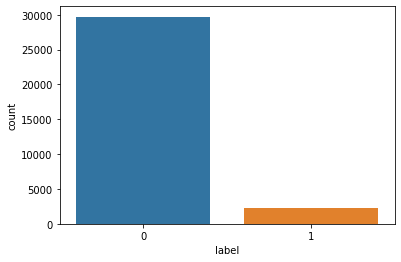

In [ ]:
# Make a count plot with the hateful and non-hateful columns
sb.countplot(df_eda['label'])

In [ ]:
# Calculate percentage distribution of hateful and non-hateful columns
df_eda['label'].value_counts()/df_eda.shape[0]

0    0.929854
1    0.070146
Name: label, dtype: float64

## **4.2 Bivariate Analysis Summary**

In [ ]:
# Here, I focus on the negative tweets found present in the data I had selected
negative_tweets = df_eda[df_eda['label']== 1]
negative_tweets.head()

,id,label,tweet,clean_tweets
13,14,1,@user #cnn calls #michigan middle school 'buil...,"[cnn, calls, michigan, middle, school, build, ..."
14,15,1,no comment! in #australia #opkillingbay #se...,"[comment, australia, opkillingbay, seashepherd..."
17,18,1,retweet if you agree!,"[retweet, agree]"
23,24,1,@user @user lumpy says i am a . prove it lumpy.,"[lumpy, says, prove, lumpy]"
34,35,1,it's unbelievable that in the 21st century we'...,"[unbelievable, 21st, century, wed, need, somet..."


In [ ]:
# Visualization of highest common words in negative tweets count
# Words I found are trump, white, black, racist, obama, dont, hate, racist among others as displayed in the graph
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# Highest common words in negative tweets count tree diagram
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

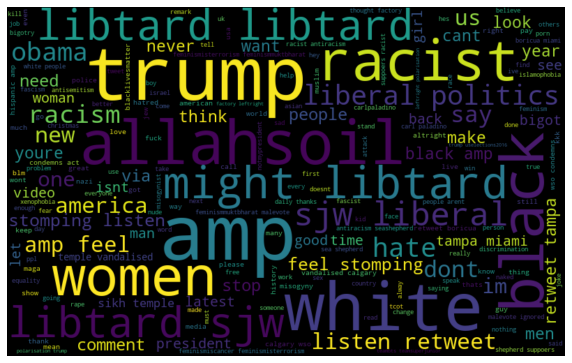

In [ ]:
# Highest common words in negative tweets count word cloud 
from wordcloud import WordCloud
all_words_neg = ' '.join([text for text in df['clean_tweets'][df['label']== 1] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neg)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Previewing the first entries of the dataset for tokenization
df.head()

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant use cause dont offer w...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [ ]:
# Application of tokenization which breaks messages into words 
from nltk.tokenize import word_tokenize 

df['clean_tweets'] = df['clean_tweets'].apply(nltk.word_tokenize)

In [ ]:
# Conversion of words to base format which is more preferable
# This process is known as lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
df["clean_tweets"] = df["clean_tweets"].apply(lambda tokens: [lemmatiser.lemmatize(token, pos='v') for token in tokens])
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, lyft, credit, cant, use, cause, dont, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,"[eat, isz, youuu]"
31958,31959,0,to see nina turner on the airwaves trying to...,"[see, nina, turner, airwaves, try, wrap, mantl..."
31959,31960,0,listening to sad songs on a monday morning otw...,"[listen, sad, songs, monday, morning, otw, wor..."
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","[sikh, temple, vandalise, calgary, wso, condem..."


In [ ]:
df.head(20)

,id,label,tweet,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, lyft, credit, cant, use, cause, dont, ..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, motivation]"
5,6,0,[2/2] huge fan fare and big talking before the...,"[22, huge, fan, fare, big, talk, leave, chaos,..."
6,7,0,@user camping tomorrow @user @user @user @use...,"[camp, tomorrow, danny]"
7,8,0,the next school year is the year for exams.ð...,"[next, school, year, year, exams, cant, think,..."
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,"[love, land, allin, cavs, champion, cleveland,..."
9,10,0,@user @user welcome here ! i'm it's so #gr...,"[welcome, im, gr8]"


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# Make a copy of train data
df1 = test.copy()
df1.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


# **5.Model Building**

In [ ]:
# Import relevant libraries for modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# In preparation of modelling, resample data
from sklearn.utils import resample
positive = df[df.label == 0]
negative = df[df.label == 1]


oversampl = resample(positive,replace=True,n_samples=len(negative), random_state=42)
oversampled = pd.concat([negative, oversampl])
df = oversampled.copy()

In [ ]:
df.label.value_counts()

1    2242
0    2242
Name: label, dtype: int64

In [ ]:
X = X.toarray()

In [ ]:
df.head()

,id,label,tweet,clean_tweets
13,14,1,@user #cnn calls #michigan middle school 'buil...,cnn call michigan middle school build wall cha...
14,15,1,no comment! in #australia #opkillingbay #se...,comment australia opkillingbay seashepherd hel...
17,18,1,retweet if you agree!,retweet agree
23,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy say prove lumpy
34,35,1,it's unbelievable that in the 21st century we'...,unbelievable 21st century wed need something l...


In [ ]:
tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join(x))

X = tf_idf.fit_transform(df['clean_tweets'] )
X

<4484x9610 sparse matrix of type '<class 'numpy.float64'>'
	with 34641 stored elements in Compressed Sparse Row format>

# **5.1 Application of Linear SVC Model**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=12000)
# TF-IDF feature matrix
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join(x))

X = tf_idf.fit_transform(df['clean_tweets'] )
X

<4484x9610 sparse matrix of type '<class 'numpy.float64'>'
	with 34641 stored elements in Compressed Sparse Row format>

In [ ]:
X = X.toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=69)
model = LinearSVC().fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report( y_test, predicted )
print(report)
acc=accuracy_score(y_test,predicted)


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       438
           1       0.88      0.85      0.86       459

    accuracy                           0.86       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.86      0.86      0.86       897



Observed accuracy is 0.86 which indicates the model is 86% accurate.

# **Final : Evaluations and Recommendations**

In [ ]:
# Make an attempt of accuracy improvement
from sklearn.svm import SVC
my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['linear','sigmoid','rbf', 'poly']} 
from sklearn.model_selection import GridSearchCV
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )


In [ ]:
grid.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=  50.3s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=  48.3s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=  55.9s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=  47.6s
[CV] END ...................C=10, gamma=scale, kernel=linear; total time=  47.8s
[CV] END ..................C=10, gamma=scale, kernel=sigmoid; total time=  55.7s
[CV] END ..................C=10, gamma=scale, kernel=sigmoid; total time=  51.8s
[CV] END ..................C=10, gamma=scale, kernel=sigmoid; total time=  31.5s
[CV] END ..................C=10, gamma=scale, kernel=sigmoid; total time=  35.1s
[CV] END ..................C=10, gamma=scale, kernel=sigmoid; total time=  58.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time= 1.0min
[CV] END ......................C=10, gamma=scal

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['linear', 'sigmoid', 'rbf', 'poly']},
             verbose=2)

In [ ]:
grid.best_params_


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_


SVC(C=10)

In [ ]:
y_hat_optimized = grid.predict(X_test)
report = classification_report( y_test, predicted )
print(report)
acc=accuracy_score(y_test,y_hat_optimized)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       438
           1       0.88      0.85      0.86       459

    accuracy                           0.86       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.86      0.86      0.86       897



# **Conclusions and Recommendations**

# **Conclusion**

I made the following recommendations which can give insight into online social media content analysis:

1. The word with the highest popularity level in the hateful tweets is trump. 
2. 6-7 words per tweet is the rate of the most hateful words per tweet.
3. Neutrality is displayed in most of the sentiments. The words themselves that are found in the hateful tweets are of a neutral nature.

# **Recommendations**

For purpose of efficiency, Twitter can enable tagging tweets with the words that we have identified as hateful. Warning labels can be put using a model to curb the amount of hate speech online. This can be done in place of humans searching for the words to make this word-search process faster and more effective.
